# Mini Programming Assignment: Exploring Hashing

**Name:** Ben Prescott

**Date:** 07/22/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

This notebook provides a comparison of the execution speeds of linear search, binary search, and a hashing algorithm using a Python Set. Each algorithm searched for six specific strings within an array of 100,000 strings, logging their execution times for comparison.  

**Algorithm Explanations**

The algorithms used and compared are linear search, binary search, and a hash lookup using a Python Set. The worst case time complexities for the algorithms are O($n$), O($log n$), and O($n$) respectively. However, while the hash algorithm is mentioned to have lookup times just as slow as linear search, is it more common for the time complexity to be O($1$), which simply states that the lookup times will be consistent across an array, regardless of the size. This is due to hash algorithms 'mapping' values to an index, which allows the algorithm to go directly to the index to retrieve the value.

**Approach**

A list of 100,000 randomly generated strings is created, each string being 10 characters long. In this case our list has 100,000 slots, each being occupied by a unique string with no empty slots and no additional data being added to the list. This means that our list will have a load factor of 1, which will help with very fast lookups. 

Three algorithms are then defined - quicksort, linear search, and binary search. Quicksort is only used to sort the list of 100,000 strings in order for binary search to work, saving this sorted list as a new object. A Python Set is created from the original 100,000 string list, which serves as an unchangable group of non-duplicated items. This Set will be used for the hash lookup. Additionally, a separate array is created from the items that exist at locations 10,000, 30,000, 50,000, 70,000, 90,000, and 100,000 of the ordered list. This array will be used to represent the strings each algorithm needs to search for. 

Linear search, binary search, and the hash lookup are all ran on their respective lists. Linear search identified the six items using the original/unsorted list, binary search used the sorted list, and the hash lookup used the Python Set. The execution times of each item lookup were recorded, stored in a temporary list, then added to a Pandas DataFrame for review. Bar charts and line charts were then used to visualize the results.  

**Results**

The results validated what was assumed prior to starting this - that linear search is by far the slowest algorithm. This is due to its sequential searching method, causing the algorithm to (likely) be very slow unless finding the match on the first element. Binary search and the hash table lookup performed the best, with the performance of the hash table showcasing its constant time, with each lookup taking nearly the same time. Due to the drastic differences between linear search and the other two algorithms, multiple graphs were displayed making some comparisons only between binary search and the hash lookup, showing the performance increase with hash tables over binary search. 

In [121]:
import numpy as np
import pandas as pd
import string
import random
import gc
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(suppress=True)

## Defining Algorithms

In [89]:
# The sorting array I'll be using to sort the list of 100k strings
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)
    
# Defining linear search for the unsorted list
def linear_search(inputlist, item):
    i = 0
    while i < len(inputlist):
        if inputlist[i] == item:
            return i
        else:
            i = i + 1
    return None

# Defining binary search (iterative) for the sorted list
def binary_search(inputlist, item):
    low = 0
    high = len(inputlist) - 1

    while low <= high:
        mid = (low + high) // 2
        guess = inputlist[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

## Generating List of Strings, Checking Duplicates, Creating Set, and Creating Sorted List Copy

In [146]:
# Creating a list of 100,000 randomly generated strings of length 10
strings_100k = [''.join(random.choices(string.ascii_letters, k = 10)) for i in range(100000)]

In [147]:
# Checking if duplicates exist
if len(strings_100k) == len(set(strings_100k)):
    print('no duplicates found')
else:
    print('duplicates found!')

no duplicates found


In [148]:
# Create a set using the list
strings_set = set(strings_100k)

# Create a copy of the original list, then sort it
strings_sorted = quicksort(strings_100k.copy())

In [149]:
# Array for select names from the sorted list
strings_select = [strings_sorted[i-1] for i in [10000, 30000, 50000, 70000, 90000, 100000]]

In [150]:
# Creating an array from the strings
strings_arr = np.asarray(strings_select)

## Recording Execution Times

In [151]:
# Recording the linear search execution times into a temporary empty list
ls_times = []
for i in strings_arr:
    start = timer()
    out = linear_search(strings_100k, i)
    end = timer()
    ls_times.append(end-start)
    print("{:.10f}".format(end-start))

0.0170638000
0.0062904000
0.0078311000
0.0022456000
0.0280261000
0.0155632000


In [152]:
# Recording the binary search execution times into a temporary empty list
bs_times = []
for i in strings_arr:
    start = timer()
    out = binary_search(strings_sorted, i)
    end = timer()
    bs_times.append(end-start)
    print("{:.10f}".format(end-start))

0.0000341000
0.0000190000
0.0000042000
0.0000320000
0.0000300000
0.0000281000


In [153]:
# Recording the hash lookup execution times into a temporary empty list
set_times = []
for i in strings_arr:
    start = timer()
    out = strings_set.remove(i)
    end = timer()
    set_times.append(end-start)
    print("{:.10f}".format(end-start))

0.0000037000
0.0000031000
0.0000027000
0.0000021000
0.0000015000
0.0000018000


## Comparison Table & Graphs

In [158]:
# Creating a Pandas DataFrame for table reference
pd.set_option("display.precision", 10)
results = pd.DataFrame(index=[i for i in strings_arr])
results.index.rename('strings', inplace=True)
results['linearsearch_times'] = ls_times
results['binarysearch_times'] = bs_times
results['setlookup_times'] = set_times
results

,linearsearch_times,binarysearch_times,setlookup_times
strings,,,
FHfeiNDaTA,0.0170638,0.0000341,0.0000037
PcGGFSRRal,0.0062904,0.0000190,0.0000031
aADoJTyunR,0.0078311,0.0000042,0.0000027
kWhFEIkDXy,0.0022456,0.0000320,0.0000021
uuADQJNPvm,0.0280261,0.0000300,0.0000015
zzxkTiJvdA,0.0155632,0.0000281,0.0000018


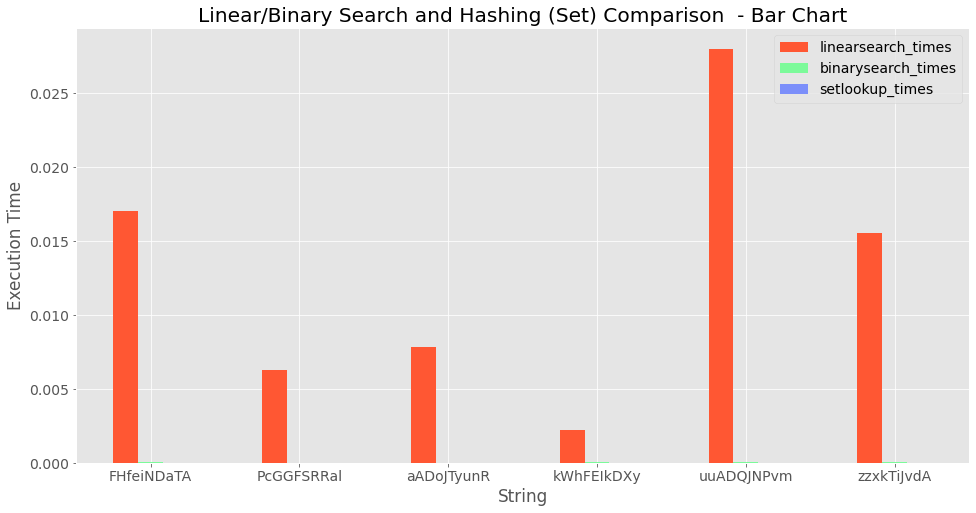

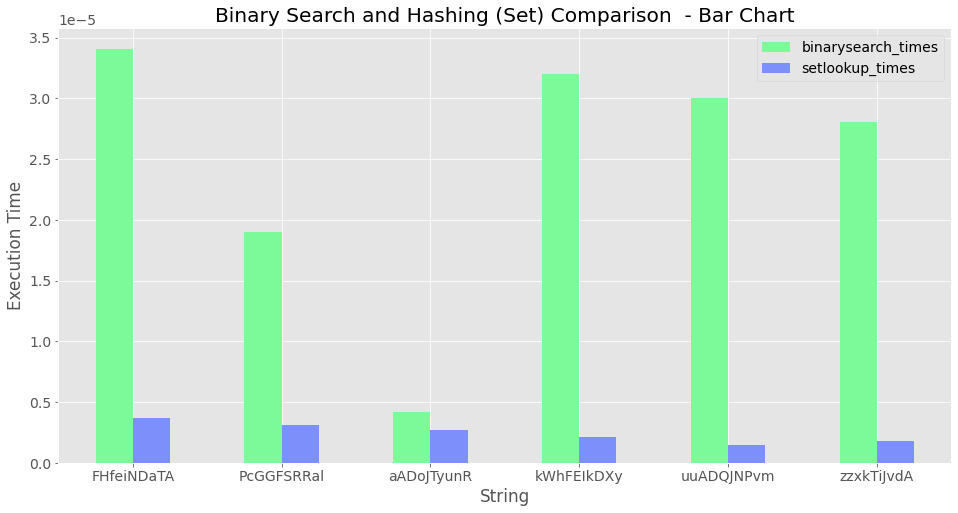

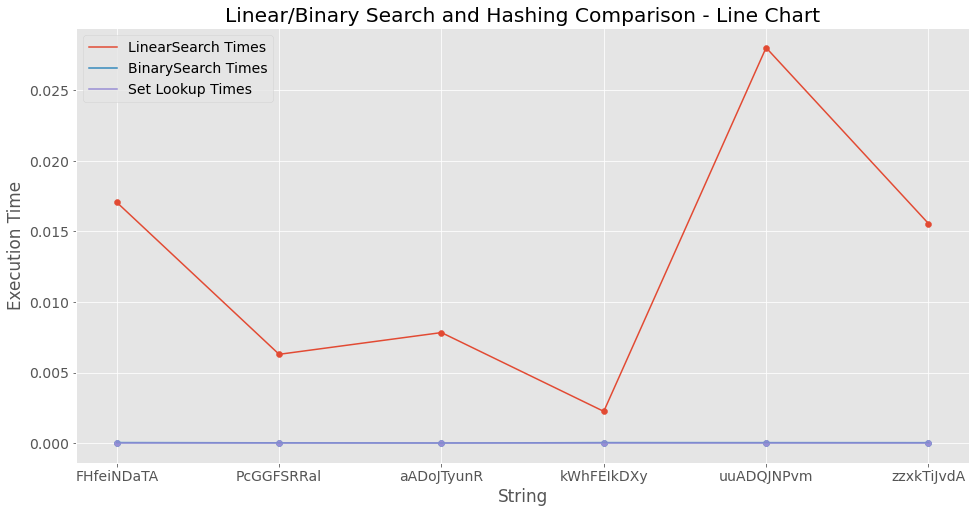

In [177]:
# Creating two plots for different views/perspectives: 1 - bar graphs, 2 - line graphs. 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

color_dict = {'linearsearch_times': '#FF5733', 'binarysearch_times': '#7CFA9A', 'setlookup_times':'#7C8FFA'}

results.plot(kind='bar',
                        xlabel='String',
                        ylabel='Execution Time',
                        figsize=(16,8),
                        fontsize=14,
                        title='Linear/Binary Search and Hashing (Set) Comparison  - Bar Chart',
             color=color_dict,
                        rot=0)

results.iloc[:,1:].plot(kind='bar',
                        xlabel='String',
                        ylabel='Execution Time',
                        figsize=(16,8),
                        fontsize=14,
                        title='Binary Search and Hashing (Set) Comparison  - Bar Chart',
                        color=color_dict,
                        rot=0)

plt.figure(figsize=(16,8))
plt.plot(results.index, results.linearsearch_times, label='LinearSearch Times')
plt.scatter(results.index, results.linearsearch_times)
plt.plot(results.index, results.binarysearch_times, label='BinarySearch Times')
plt.scatter(results.index, results.binarysearch_times)
plt.plot(results.index, results.setlookup_times, label='Set Lookup Times')
plt.scatter(results.index, results.setlookup_times)
plt.xlabel('String')
plt.ylabel('Execution Time')
plt.xticks(results.index)
plt.title('Linear/Binary Search and Hashing (Set) Comparison - Line Chart')
plt.legend()
plt.plot();

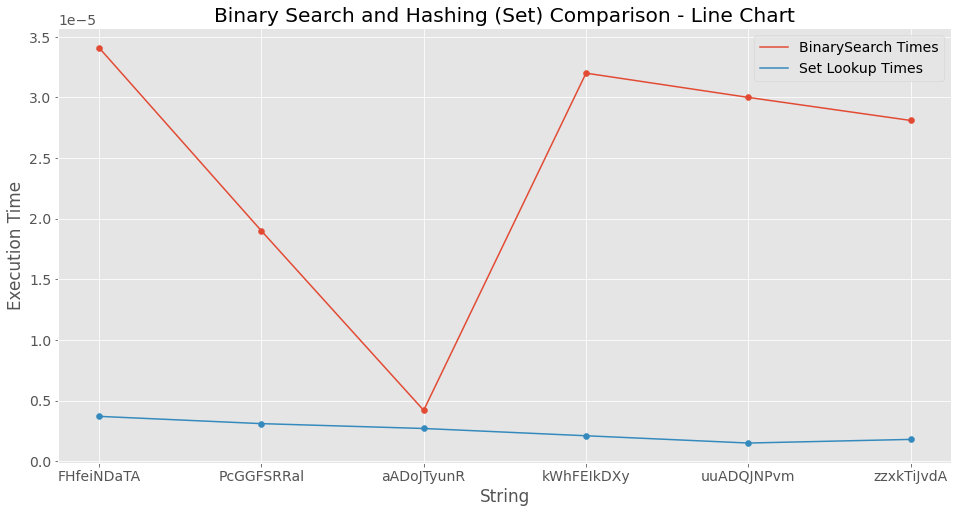

In [179]:
plt.figure(figsize=(16,8))
plt.plot(results.index, results.binarysearch_times, label='BinarySearch Times')
plt.scatter(results.index, results.binarysearch_times)
plt.plot(results.index, results.setlookup_times, label='Set Lookup Times')
plt.scatter(results.index, results.setlookup_times)
plt.xlabel('String')
plt.ylabel('Execution Time')
plt.xticks(results.index)
plt.title('Binary Search and Hashing (Set) Comparison - Line Chart')
plt.legend()
plt.plot();